In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
movies = pd.read_csv("/content/tmdb_5000_movies.csv")


In [6]:
# Data Preprocessing and Cleaning
movies.drop_duplicates(inplace=True)  # Drop duplicates
movies.dropna(subset=['overview'], inplace=True)  # Drop rows with missing overview


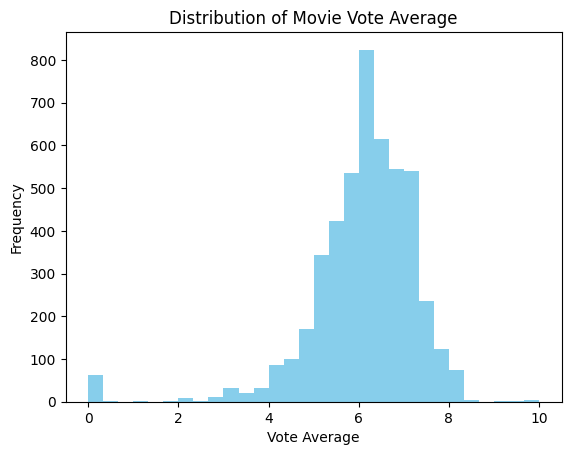

In [7]:
# Data Visualization and Analysis
# Visualize movie attributes and user preferences
plt.hist(movies['vote_average'], bins=30, color='skyblue')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Vote Average')
plt.show()

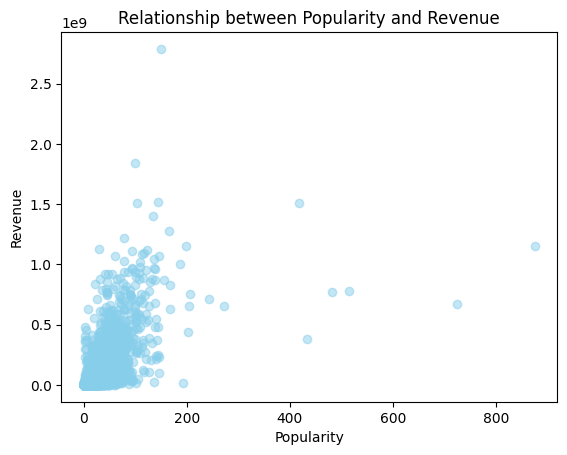

In [17]:
# Visualize the relationship between popularity and revenue
plt.scatter(movies['popularity'], movies['revenue'], color='skyblue', alpha=0.5)
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Relationship between Popularity and Revenue')
plt.show()

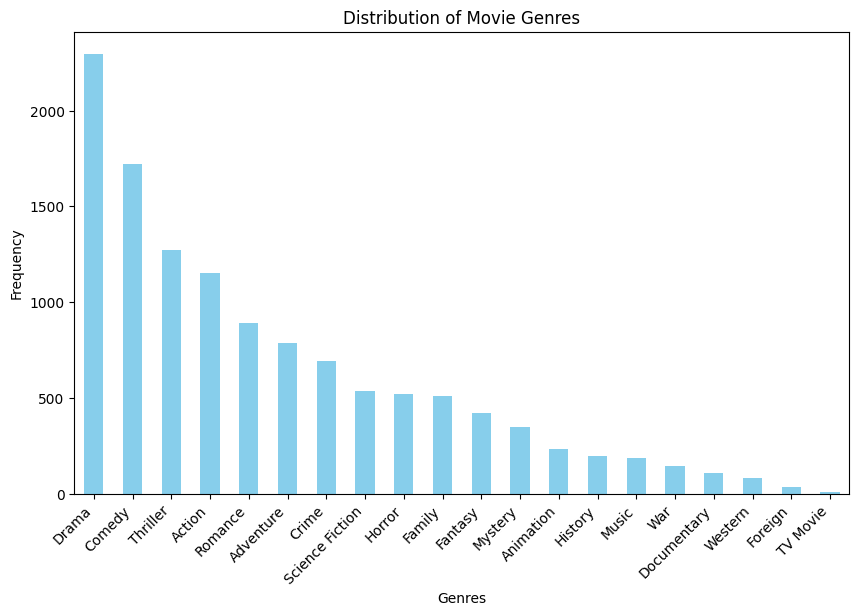

In [14]:
# Visualize movie genres distribution
genres = []
for genre_list in movies['genres']:
    genres.extend([genre['name'] for genre in eval(genre_list)])
genre_counts = pd.Series(genres).value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=45, ha='right')
plt.show()

In [8]:
# Feature Extraction
# Handcrafted feature extraction: Extract genres from the 'genres' column
movies['genres_list'] = movies['genres'].apply(lambda x: [genre['name'] for genre in eval(x)])
# Non-handcrafted feature extraction: TF-IDF Vectorization for movie overview
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['overview'])

In [9]:
# Content-Based Recommendation
# Calculate cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [10]:
# Define recommendation function
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = movies.loc[movies['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]


In [11]:
# Test the recommendation system
print(get_recommendations('Avatar'))


3604                       Apollo 18
2130                    The American
634                       The Matrix
1341            The Inhabited Island
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2628             Blood and Chocolate
Name: title, dtype: object


In [12]:
# Experimental Results Analysis
# For simplicity, we'll just print the top recommended movies for a few titles to visually inspect the results.
titles_to_test = ['Avatar', 'The Dark Knight', 'Inception']
for title in titles_to_test:
    print(f"\nTop recommended movies for '{title}':")
    print(get_recommendations(title))


Top recommended movies for 'Avatar':
3604                       Apollo 18
2130                    The American
634                       The Matrix
1341            The Inhabited Island
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2628             Blood and Chocolate
Name: title, dtype: object

Top recommended movies for 'The Dark Knight':
3                         The Dark Knight Rises
428                              Batman Returns
3854    Batman: The Dark Knight Returns, Part 2
299                              Batman Forever
1359                                     Batman
119                               Batman Begins
1181                                        JFK
9            Batman v Superman: Dawn of Justice
2507                                  Slow Burn
210                              Batman & Robin
Name: title, dtype: object

Top recomm